## What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('data/human_body_temperature.csv')

In [100]:
df.head(5)

,temperature,gender,heart_rate
0,99.3,F,68
1,98.4,F,81
2,97.8,M,73
3,99.2,F,66
4,98.0,F,73


In [112]:
from __future__ import print_function, division

import numpy as np
import scipy.stats as st

import matplotlib.pyplot as pyplot
import matplotlib.mlab as mlab
from ipywidgets import interact, fixed
from IPython.html import widgets

# seed the random number generator so we all get the same results
numpy.random.seed(17)

# some nice colors from http://colorbrewer2.org/
COLOR1 = '#7fc97f'
COLOR2 = '#beaed4'
COLOR3 = '#fdc086'
COLOR4 = '#ffff99'
COLOR5 = '#386cb0'

%matplotlib inline

1. Is the distribution of body temperatures normal?


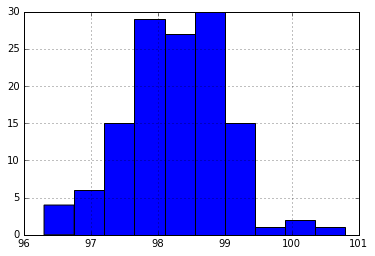

In [75]:
df['temperature'].hist()


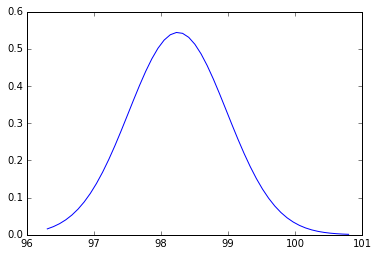

In [118]:
import math
temp = df['temperature']
mean_sample = temp.mean()
std_sample = temp.std()
min = temp.min()
max = temp.max()
sample_size = temp.size
x = numpy.linspace(min,max)
pyplot.plot(x,mlab.normpdf(x,mean_sample,std_sample))
pyplot.show()

In [109]:
st.mstats.normaltest(df.temperature)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

1. Answer = YES, it is a normal distribution, looking at the bell curve and also since the p-value = 0.26 > 0.05

2) Is the true population mean really 98.6 degrees F?


In [207]:
# H0(Null Hypothesis test): u = 98.6
# H1(Alternate Hypothesis test): u != 98.6
mean_pop = 98.6

# Define aplha(threshold)
alpha = 0.05
#Assuming H0 = true, finding the prob that mean of sample = 98.25(derived from sample)
#Lets consider a sampling distribution 
#Since H0 = true, mean of samp dist = mean of pop 98.6

# std of samp dist = std of pop/sqrt(n) = std of sample/ sqrt(n) 
std_sample_distribution = std_sample / np.sqrt(sample_size)
print('Standard deviation of sample distribution =', std_sample_distribution)
    
if(sample_size > 30):
    print('Ideal to use z-test because sample size is > 30')
else :
    print('Ideal to use t-test because of small sample size')

p_value = st.norm.cdf(mean_sample,mean_pop,std_sample_distribution)
print ('P-Value =',p_value)

if(p_value < alpha):
    print('Since p-value is less than our aplha, we reject the null hypothesis. Hence population mean is not equal to',mean_pop)
else:
    print('We accept the null hypothesis, Hence population mean is equal to',mean_pop)

#z-score = 98.25 - 98.6 / 0.064 = -5.4
#which means it is 5.4 standard deviations away from the mean

Standard deviation of sample distribution = 0.0643044168379
Ideal to use z-test because sample size is > 30
P-Value = 2.45107850706e-08
Since p-value is less than our aplha, we reject the null hypothesis. Hence population mean is not equal to 98.6


3) At what temperature should we consider someone's temperature to be "abnormal"?

In [164]:
# Let's consider 95% confidence interval
alpha = 0.05
# Calculating critical z-value of 97.5 since z table corrresponds to one-tailed test
z_critical = st.norm.ppf(0.975)
#1.96 = (mean_sample - u) / (std_sample)
u_min = mean_sample - z_critical*std_sample_distribution
u_max = mean_sample + z_critical*std_sample_distribution
u_min,u_max
print('Any temperature that lies outside of',(u_min,u_max),'is considered abnormal')
print('Margin of error:',100*z_critical*std_sample_distribution,'%')


Any temperature that lies outside of (98.123196428181657, 98.375265110279898) is considered abnormal
Margin of error: 12.6034341049 %


4) Is there a significant difference between males and females in normal temperature?

In [206]:
# H0: No significant difference -> mean_males = mean_females
# H1: Significant different -> mean_males != mean_females
# Assume H0
alpha = 0.05
temp_male = df[df.gender == 'M'].temperature
temp_female = df[df.gender == 'F'].temperature
mean_male = temp_male.mean()
var_male = temp_male.var()
mean_female = temp_female.mean()
var_female = temp_female.var()
size_male = temp_male.size
size_female = temp_female.size

# Assuming H0, finding prob of getting mean_sample_diff
mean_sample_diff = mean_female - mean_male
print ('Difference in means:', mean_sample_diff)

# Lets consider a sampling distribution
# Mean of differences = 0 (according to H0 assumption)
mean_sampledist_diff = 0
# Std of diff = Std of pop diff / 
std_sampledist_diff = np.sqrt((var_male / size_male) + (var_female / size_female))

# Find critical z-value
z_critical = st.norm.ppf(0.975)
value_critical = z_critical*std_sampledist_diff
print ('Critical value:',value_critical)

if(mean_sample_diff > value_critical): 
    # Rejecting NULL hypothesis
    print ('There is a significant difference between males and females normal temperature')
else:
    print ('There is no significant difference between males and females normal temperature')

Difference in means: 0.289230769231
Critical value: 0.248041184924
There is a significant difference between males and females normal temperature
